Sample Singapore Traffic Video Analysis

In [1]:
import ffmpeg
import os

def extract_frame_info(video_path, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    

    probe = ffmpeg.probe(video_path)
    video_info = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
    
    frame_info_path = os.path.join(output_dir, 'frame_info.txt')
    with open(frame_info_path, 'w') as f:
        for key, value in video_info.items():
            f.write(f'{key}: {value}\n')

    print(f"Frame information extracted and saved to {frame_info_path}")

video_path = '/Users/varun/Downloads/sample_video.mp4'  
# Path to the output directory to save frame information
output_dir = '/Users/varun/Downloads/SEM 7/iva2'

# Extract and save frame information
extract_frame_info(video_path, output_dir)

Frame information extracted and saved to /Users/varun/Downloads/SEM 7/iva2/frame_info.txt


Frame counts: {'I': 3, 'P': 317, 'B': 281}
Percentages: {'I': 0.49916805324459235, 'P': 52.74542429284526, 'B': 46.75540765391015}


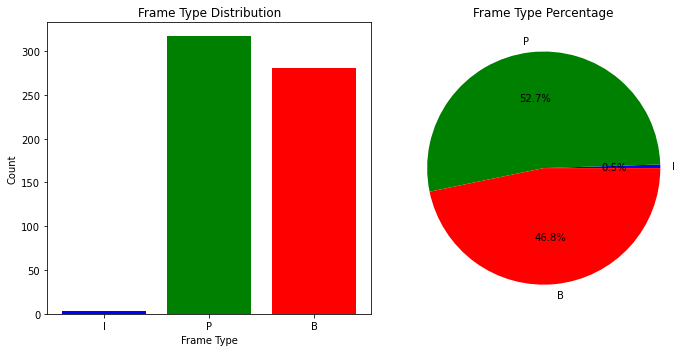

In [2]:
import subprocess
import json
import matplotlib.pyplot as plt

def extract_frames_info(video_path):
    try:
        cmd = [
            'ffprobe',
            '-v', 'error',
            '-select_streams', 'v:0',
            '-show_entries', 'frame=pict_type',
            '-of', 'json',
            video_path
        ]
        result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode != 0:
            print(f"Error: {result.stderr}")
            return None
        return json.loads(result.stdout)
    except Exception as e:
        print(f"Exception occurred: {str(e)}")
        return None

# Function to count frame types
def count_frame_types(frames_info):
    frame_counts = {'I': 0, 'P': 0, 'B': 0}
    for frame in frames_info['frames']:
        frame_type = frame['pict_type']
        if frame_type in frame_counts:
            frame_counts[frame_type] += 1
    return frame_counts

# Function to calculate percentages
def calculate_percentages(frame_counts):
    total_frames = sum(frame_counts.values())
    percentages = {frame: (count / total_frames) * 100 for frame, count in frame_counts.items()}
    return percentages

# Function to plot frame distribution
def plot_frame_distribution(frame_counts):
    frame_types = list(frame_counts.keys())
    counts = list(frame_counts.values())

    plt.figure(figsize=(10, 5))

    # Bar graph
    plt.subplot(1, 2, 1)
    plt.bar(frame_types, counts, color=['blue', 'green', 'red'])
    plt.title('Frame Type Distribution')
    plt.xlabel('Frame Type')
    plt.ylabel('Count')

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=frame_types, autopct='%1.1f%%', colors=['blue', 'green', 'red'])
    plt.title('Frame Type Percentage')

    plt.tight_layout()
    plt.show()

# Main function
def main(video_path):
    frames_info = extract_frames_info(video_path)
    if frames_info is not None:
        frame_counts = count_frame_types(frames_info)
        percentages = calculate_percentages(frame_counts)
        print(f"Frame counts: {frame_counts}")
        print(f"Percentages: {percentages}")
        plot_frame_distribution(frame_counts)
    else:
        print("Failed to retrieve frame information from the video file.")


video_path = '/Users/varun/Downloads/sample_video.mp4'  
main(video_path)

ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

I-Frame Quality: PSNR=40.75249510845481, SSIM=0.9797842673132235, MSE=5.468029513888889
P-Frame Quality: PSNR=21.33481987826506, SSIM=0.7647531110044927, MSE=478.18766927083334
B-Frame Quality: PSNR=11.727120719582164, SSIM=0.2837464682200605, MSE=4368.861618923611


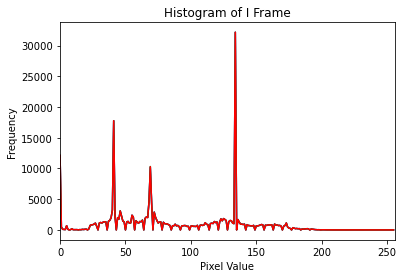

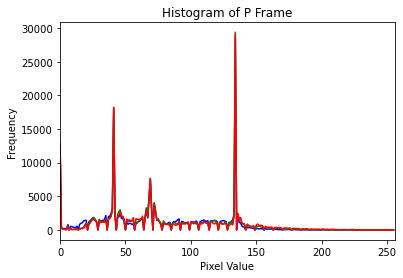

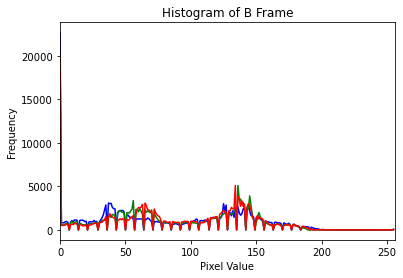

In [3]:
import subprocess
import os
import cv2
import glob
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error
from matplotlib import pyplot as plt

# Function to extract frames using ffmpeg
def extract_frames(video_path, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Extract I frames
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\,I)', '-vsync', 'vfr', f'{output_dir}/I_frame_%04d.png'])

    # Extract P frames
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\,P)', '-vsync', 'vfr', f'{output_dir}/P_frame_%04d.png'])

    # Extract B frames
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\,B)', '-vsync', 'vfr', f'{output_dir}/B_frame_%04d.png'])

# Function to compare visual quality using PSNR, SSIM, and MSE
def compare_quality(reference_image, test_image):
    ref_img = cv2.imread(reference_image, cv2.IMREAD_GRAYSCALE)
    test_img = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)

    psnr_value = peak_signal_noise_ratio(ref_img, test_img)
    ssim_value = structural_similarity(ref_img, test_img)
    mse_value = mean_squared_error(ref_img, test_img)

    return psnr_value, ssim_value, mse_value

# Function to compute and display histograms
def compute_histogram(image_path, title):
    image = cv2.imread(image_path)
    color = ('b', 'g', 'r')
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.show()

# Main function
def main(video_path):
    output_dir = 'extracted_frames'
    extract_frames(video_path, output_dir)

    # Get list of extracted frame files
    I_frames = sorted(glob.glob(f'{output_dir}/I_frame_*.png'))
    P_frames = sorted(glob.glob(f'{output_dir}/P_frame_*.png'))
    B_frames = sorted(glob.glob(f'{output_dir}/B_frame_*.png'))

    # Select middle frames to avoid black frames at the beginning
    def select_middle_frames(frame_list, num_frames=1):
        middle_index = len(frame_list) // 2
        start = max(0, middle_index - num_frames // 2)
        end = start + num_frames
        return frame_list[start:end]

    # Select middle frames
    selected_I_frames = select_middle_frames(I_frames, num_frames=2)
    selected_P_frames = select_middle_frames(P_frames, num_frames=1)
    selected_B_frames = select_middle_frames(B_frames, num_frames=1)

    # Compare visual quality of selected frames
    if len(selected_I_frames) >= 2 and selected_P_frames and selected_B_frames:
        reference_frame = selected_I_frames[0]  # Using one I-frame as reference

        psnr_i, ssim_i, mse_i = compare_quality(reference_frame, selected_I_frames[1])
        psnr_p, ssim_p, mse_p = compare_quality(reference_frame, selected_P_frames[0])
        psnr_b, ssim_b, mse_b = compare_quality(reference_frame, selected_B_frames[0])

        print(f"I-Frame Quality: PSNR={psnr_i}, SSIM={ssim_i}, MSE={mse_i}")
        print(f"P-Frame Quality: PSNR={psnr_p}, SSIM={ssim_p}, MSE={mse_p}")
        print(f"B-Frame Quality: PSNR={psnr_b}, SSIM={ssim_b}, MSE={mse_b}")

        # Compute and display histograms
        compute_histogram(reference_frame, "Histogram of I Frame")
        compute_histogram(selected_P_frames[0], "Histogram of P Frame")
        compute_histogram(selected_B_frames[0], "Histogram of B Frame")


video_path = '/Users/varun/Downloads/sample_video.mp4'  
main(video_path)

ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --

Number of I frames: 559
Number of P frames: 13703
Number of B frames: 48872
I-Frame sizes: [77464, 96454, 126986, 96700, 64055, 43885, 35715, 28488, 24240, 19131, 17574, 15571, 15154, 14427, 3798, 1600, 3465, 8475, 8553, 8684, 8680, 8706, 8613, 8636, 8702, 8485, 8418, 8655, 7438, 7785, 9455, 9961, 9904, 10061, 10163, 10630, 10954, 9274, 9894, 11764, 11858, 12050, 11797, 12587, 10715, 10745, 12578, 12870, 12898, 13558, 13755, 14064, 13750, 14490, 14803, 14717, 14717, 15973, 14589, 12656, 13941, 14921, 12957, 17691, 19003, 18312, 18339, 18750, 18601, 18433, 18583, 18265, 18465, 18422, 16351, 16991, 18665, 20201, 19241, 17095, 17520, 22322, 22386, 22764, 22635, 23190, 22408, 23196, 17990, 20234, 20326, 20949, 20993, 20896, 25249, 25999, 25286, 26239, 25895, 25395, 24155, 24898, 25702, 26078, 25366, 25258, 26015, 26053, 25225, 25721, 26470, 25806, 30364, 30796, 30567, 22995, 22599, 28558, 28353, 28418, 26167, 30029, 30847, 30328, 24721, 26417, 26370, 31209, 29558, 30701, 29025, 28936, 2503

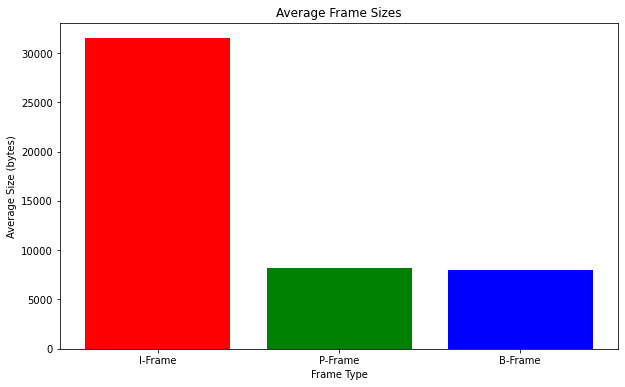

In [4]:
import subprocess
import os
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error

def extract_frames(video_path, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Extract I frames
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\,I)', '-vsync', 'vfr', f'{output_dir}/I_frame_%04d.jpg'])

    # Extract P frames
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\,P)', '-vsync', 'vfr', f'{output_dir}/P_frame_%04d.jpg'])

    # Extract B frames
    subprocess.run(['ffmpeg', '-i', video_path, '-vf', 'select=eq(pict_type\,B)', '-vsync', 'vfr', f'{output_dir}/B_frame_%04d.jpg'])

# Function to calculate file sizes
def calculate_file_sizes(frame_files):
    sizes = [os.path.getsize(f) for f in frame_files]
    return sizes

# Function to compare average file sizes
def compare_file_sizes(I_sizes, P_sizes, B_sizes):
    print("Calculating average file sizes...")

    avg_I_size = np.mean(I_sizes) if I_sizes else 0
    avg_P_size = np.mean(P_sizes) if P_sizes else 0
    avg_B_size = np.mean(B_sizes) if B_sizes else 0

    print(f"Average I-Frame size: {avg_I_size} bytes")
    print(f"Average P-Frame size: {avg_P_size} bytes")
    print(f"Average B-Frame size: {avg_B_size} bytes")

    return avg_I_size, avg_P_size, avg_B_size

# Function to plot average file sizes
def plot_file_sizes(avg_I_size, avg_P_size, avg_B_size):
    frame_types = ['I-Frame', 'P-Frame', 'B-Frame']
    avg_sizes = [avg_I_size, avg_P_size, avg_B_size]

    plt.figure(figsize=(10, 6))
    plt.bar(frame_types, avg_sizes, color=['red', 'green', 'blue'])
    plt.xlabel('Frame Type')
    plt.ylabel('Average Size (bytes)')
    plt.title('Average Frame Sizes')
    plt.show()

# Main function
def main(video_path):
    output_dir = 'extracted_frames'
    extract_frames(video_path, output_dir)

    # Get list of extracted frame files
    I_frames = sorted(glob.glob(f'{output_dir}/I_frame_*.jpg'))
    P_frames = sorted(glob.glob(f'{output_dir}/P_frame_*.jpg'))
    B_frames = sorted(glob.glob(f'{output_dir}/B_frame_*.jpg'))

    # Print the number of frames found
    print(f"Number of I frames: {len(I_frames)}")
    print(f"Number of P frames: {len(P_frames)}")
    print(f"Number of B frames: {len(B_frames)}")

    # Calculate file sizes
    I_sizes = calculate_file_sizes(I_frames)
    P_sizes = calculate_file_sizes(P_frames)
    B_sizes = calculate_file_sizes(B_frames)

    # Print sizes for debugging
    print("I-Frame sizes:", I_sizes)
    print("P-Frame sizes:", P_sizes)
    print("B-Frame sizes:", B_sizes)

    # Compare average file sizes
    avg_I_size, avg_P_size, avg_B_size = compare_file_sizes(I_sizes, P_sizes, B_sizes)

    # Plot average file sizes
    plot_file_sizes(avg_I_size, avg_P_size, avg_B_size)




video_path = '/Users/varun/Downloads/sample_video.mp4'  
main(video_path)